# Data Cleaning

In [53]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
data = pd.read_csv('data/basketball_data.csv')

In [55]:
data.head()

,Unnamed: 0,player_name,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Oklahoma St.,B12,...,2.53637,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.87260
1,1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,USC,P12,...,5.25248,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.10197
2,2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Florida St.,ACC,...,2.99510,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.85045
3,3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Gonzaga,WCC,...,4.11123,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.42283
4,4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Michigan,B10,...,3.05480,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,9.22711


In [56]:
#dropping unnecessary columns

data.drop(columns=['ht', 'type', 'TEAM', 'team', 'YEAR', 'player_name', 'Unnamed: 0', 'Unnamed: 65', 'num', 'rimmade', 'rimmade+rimmiss', 'midmade', 
'midmade+midmiss', 'dunksmade', 'dunksmiss+dunksmade', 'pick', 'pfr', 'pid', 'gbpm', 'ogbpm', 'dgbpm', 'year'], inplace=True)

In [57]:
#renaming column
data.rename(columns={'Unnamed: 64': 'Position'}, inplace=True)

In [58]:
#created our target class (whether an observation has ROUND 1 value or ROUND 2 value)
data['Class'] = data.ROUND.apply(lambda x: 1 if x == 1 else 0)

In [59]:
#dropped more unneccessary columns
data.drop(columns=['ROUND', 'ROUND.1', 'OVERALL'], inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AFFILIATION                      1487 non-null   object 
 1   conf                             1487 non-null   object 
 2   GP                               1487 non-null   int64  
 3   Min_per                          1487 non-null   float64
 4   Ortg                             1487 non-null   float64
 5   usg                              1487 non-null   float64
 6   eFG                              1487 non-null   float64
 7   TS_per                           1487 non-null   float64
 8   ORB_per                          1487 non-null   float64
 9   DRB_per                          1487 non-null   float64
 10  AST_per                          1487 non-null   float64
 11  TO_per                           1487 non-null   float64
 12  FTM                 

# EDA

In [63]:
#separting dataframes by Class

#firstround picks
first_rd = data[data.Class==1]

#secondround picks
second_rd = data[data.Class==0]

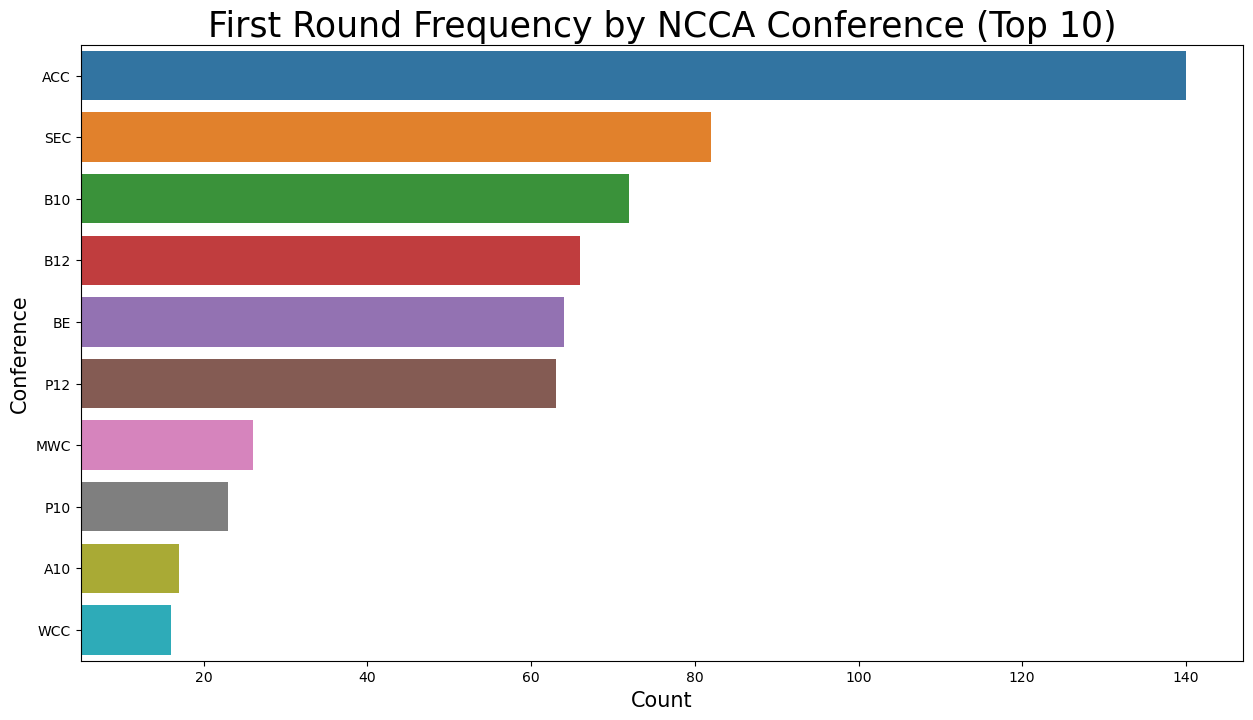

In [64]:
import seaborn as sns

conference = first_rd.groupby(['conf'])['Class'].count().sort_values(ascending=False).iloc[:10].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='conf', data=conference, orient='h', ax=ax)

ax.set_title('First Round Frequency by NCCA Conference (Top 10)', fontsize=25)

ax.set_ylabel('Conference', fontsize=15)
ax.set_xlabel('Count', fontsize=15)
ax.set_xlim(5)


plt.show()


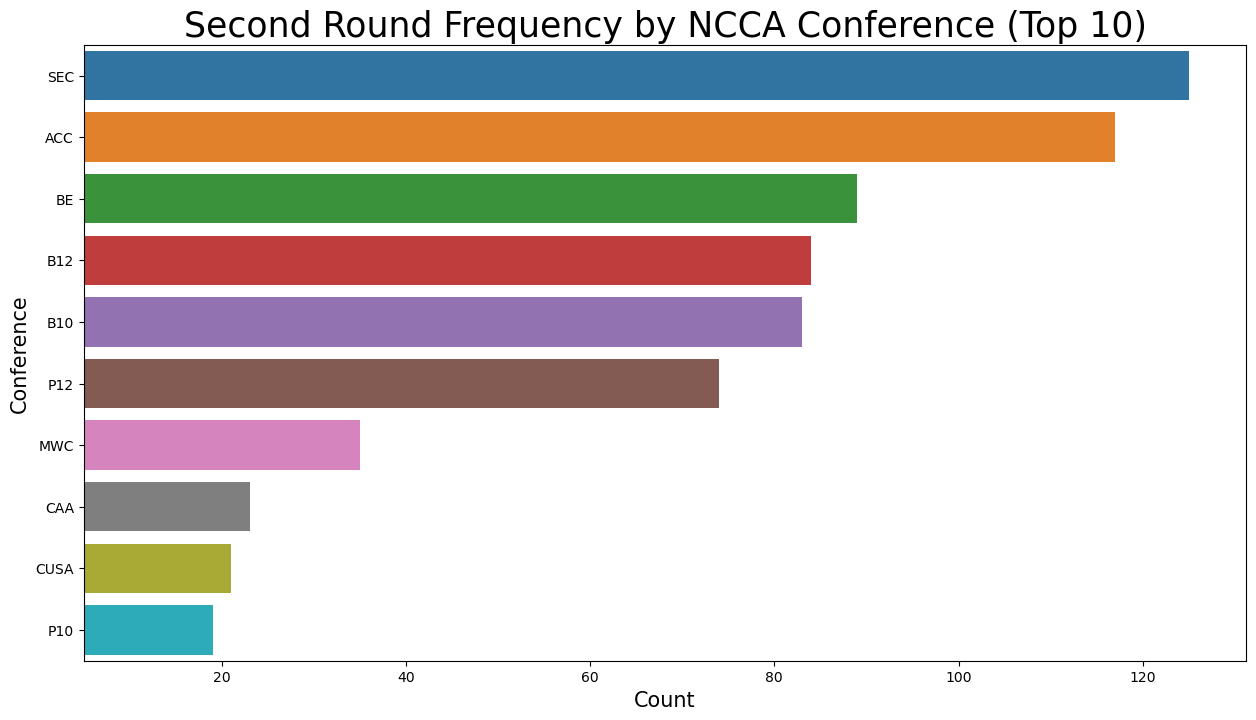

In [65]:
conference_two = second_rd.groupby(['conf'])['Class'].count().sort_values(ascending=False).iloc[:10].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='conf', data=conference_two, orient='h', ax=ax)

ax.set_title('Second Round Frequency by NCCA Conference (Top 10)', fontsize=25)

ax.set_ylabel('Conference', fontsize=15)
ax.set_xlabel('Count', fontsize=15)
ax.set_xlim(5)


plt.show()

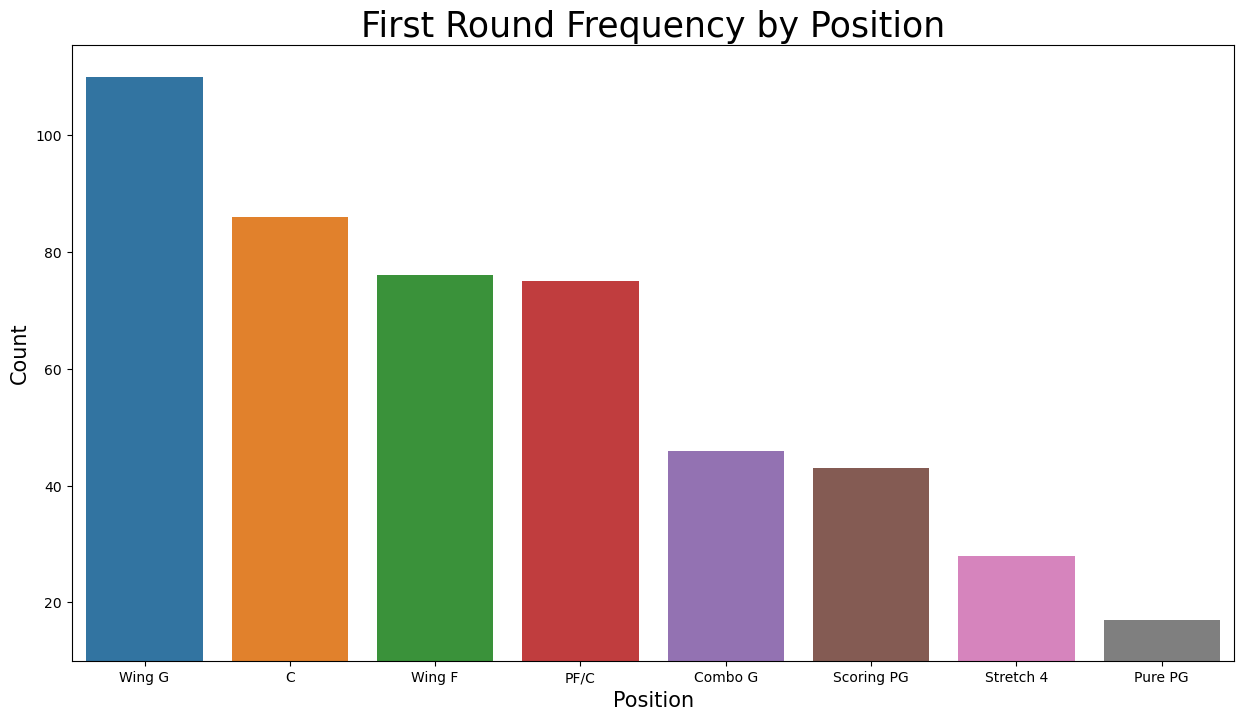

In [77]:
position = first_rd.dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Position', y='Class', data=position)

ax.set_title('First Round Frequency by Position', fontsize=25)

ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Position', fontsize=15)

ax.set_ylim(10)

plt.show()


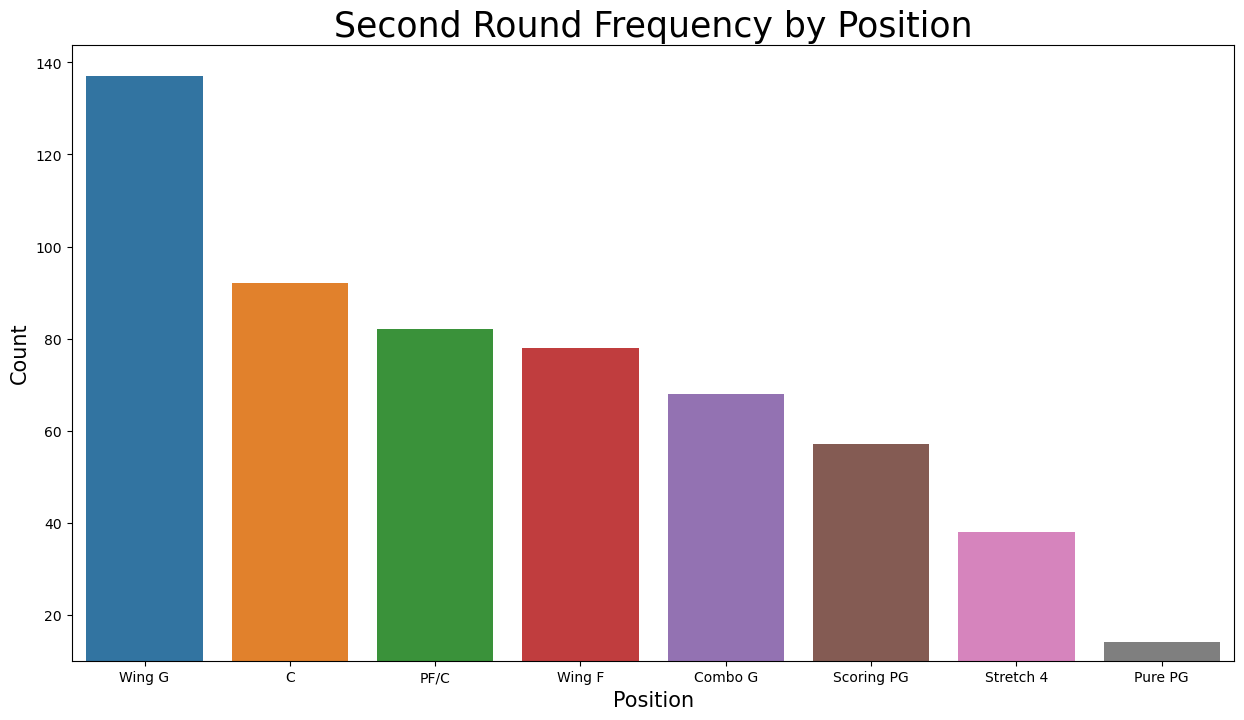

In [79]:
position_two = second_rd.dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Position', y='Class', data=position_two)

ax.set_title('Second Round Frequency by Position', fontsize=25)

ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Position', fontsize=15)

ax.set_ylim(10)

plt.show()

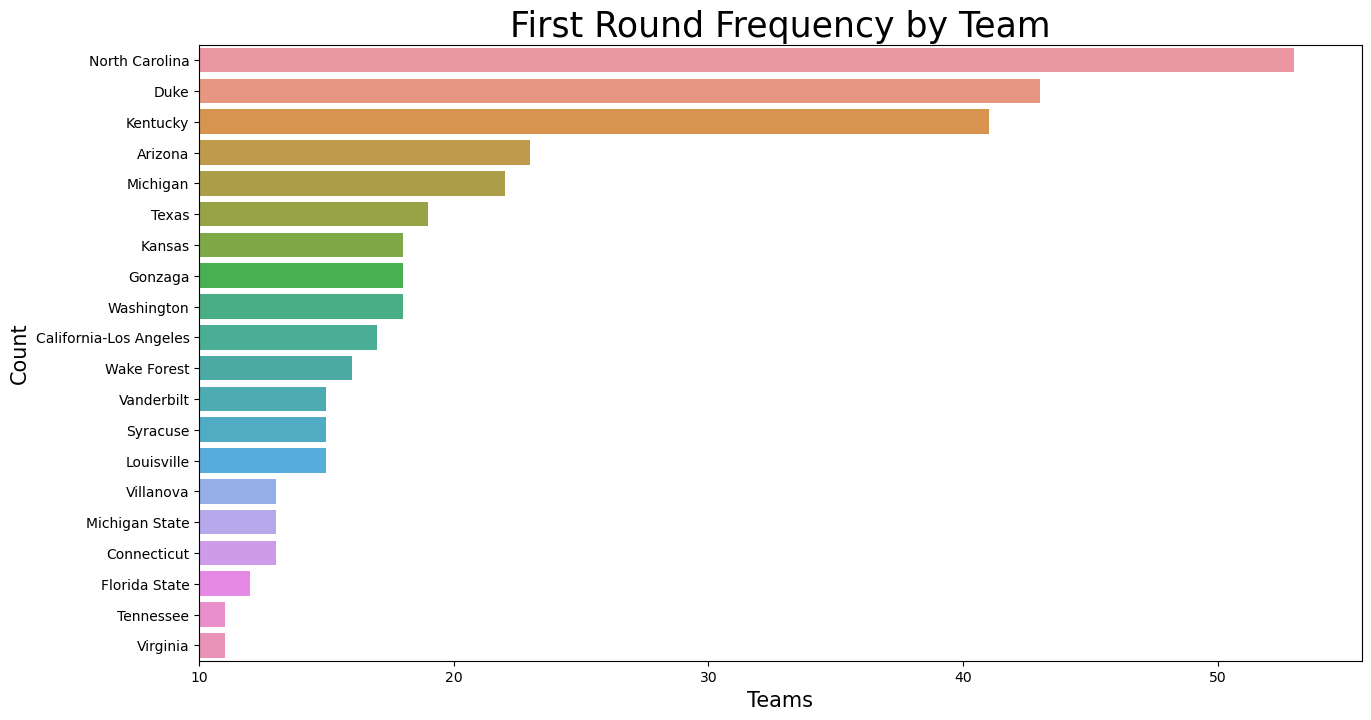

In [84]:
team = first_rd.groupby(['AFFILIATION'])['Class'].count().sort_values(ascending=False).iloc[:20].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='AFFILIATION', data=team, orient='h')

ax.set_title('First Round Frequency by Team', fontsize=25)
ax.set_xlabel('Teams', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_xlim(10)


plt.show()



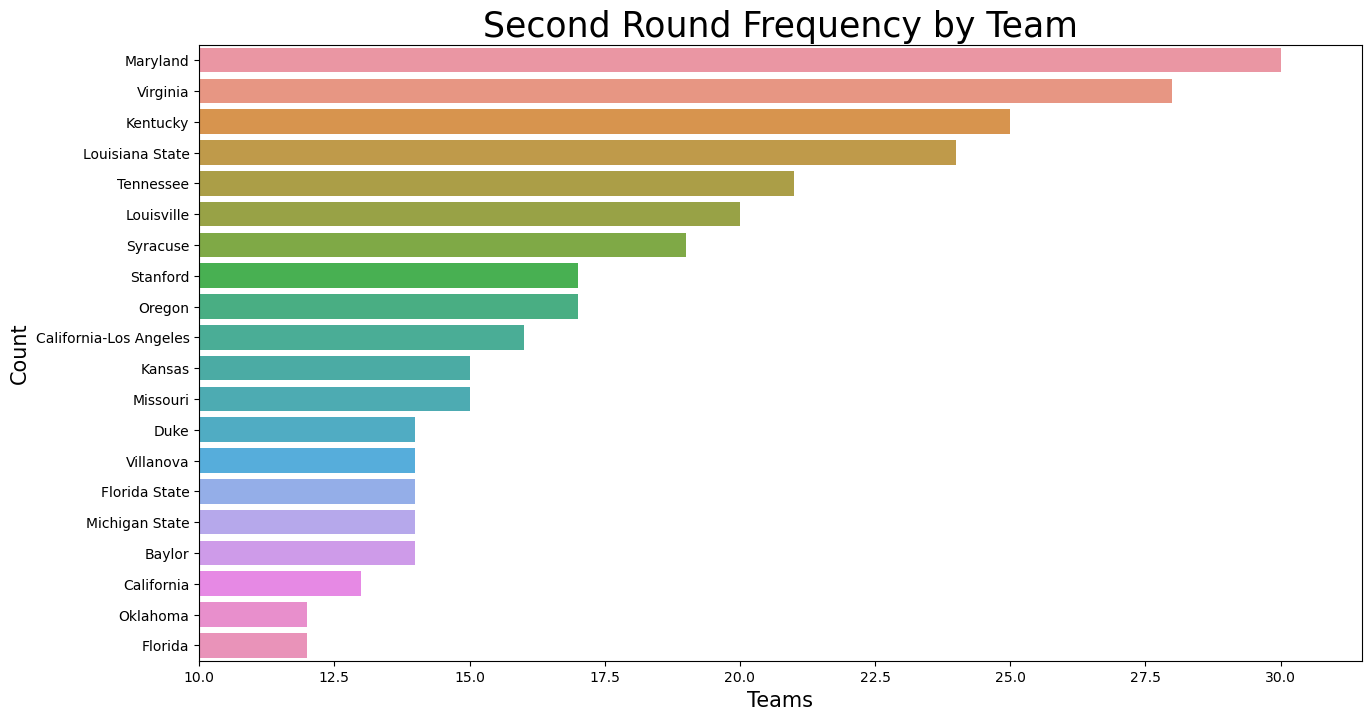

In [87]:
team_two = second_rd.groupby(['AFFILIATION'])['Class'].count().sort_values(ascending=False).iloc[:20].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='AFFILIATION', data=team_two, orient='h')

ax.set_title('Second Round Frequency by Team', fontsize=25)
ax.set_xlabel('Teams', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_xlim(10)


plt.show()

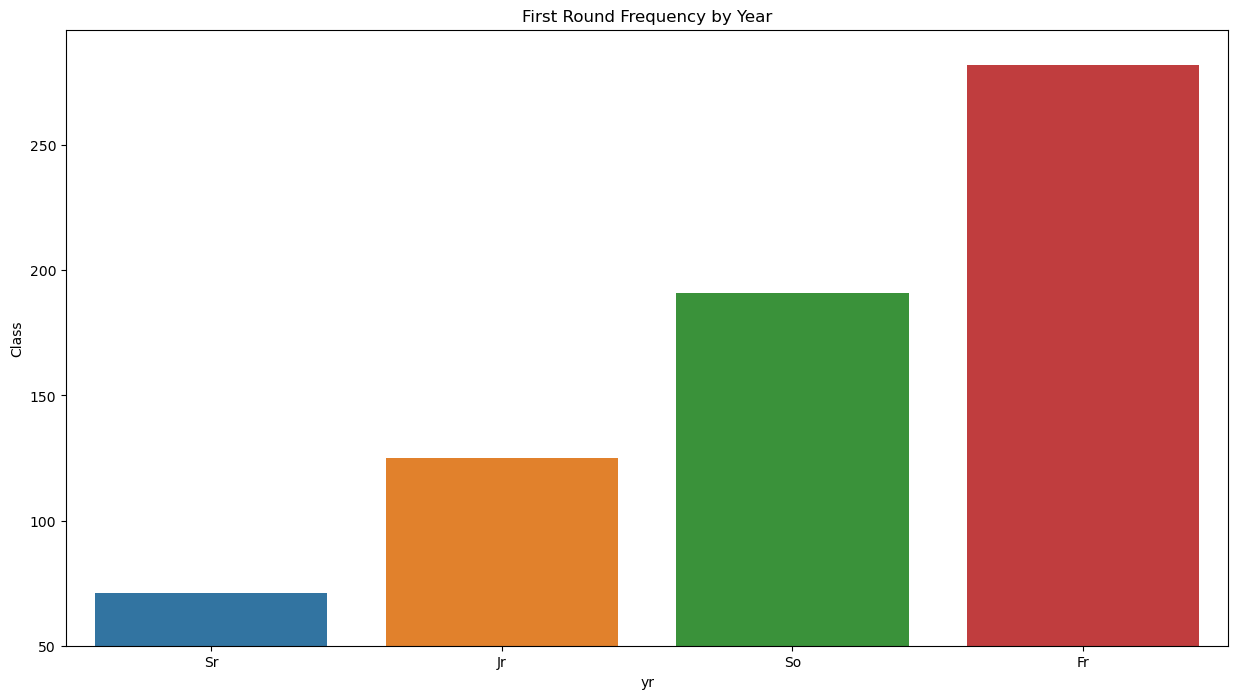

In [105]:
year = first_rd.groupby(['yr'])['Class'].count().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='yr', y='Class', data=year)

ax.set_title('First Round Frequency by Year')

ax.set_ylim(50)

plt.show()

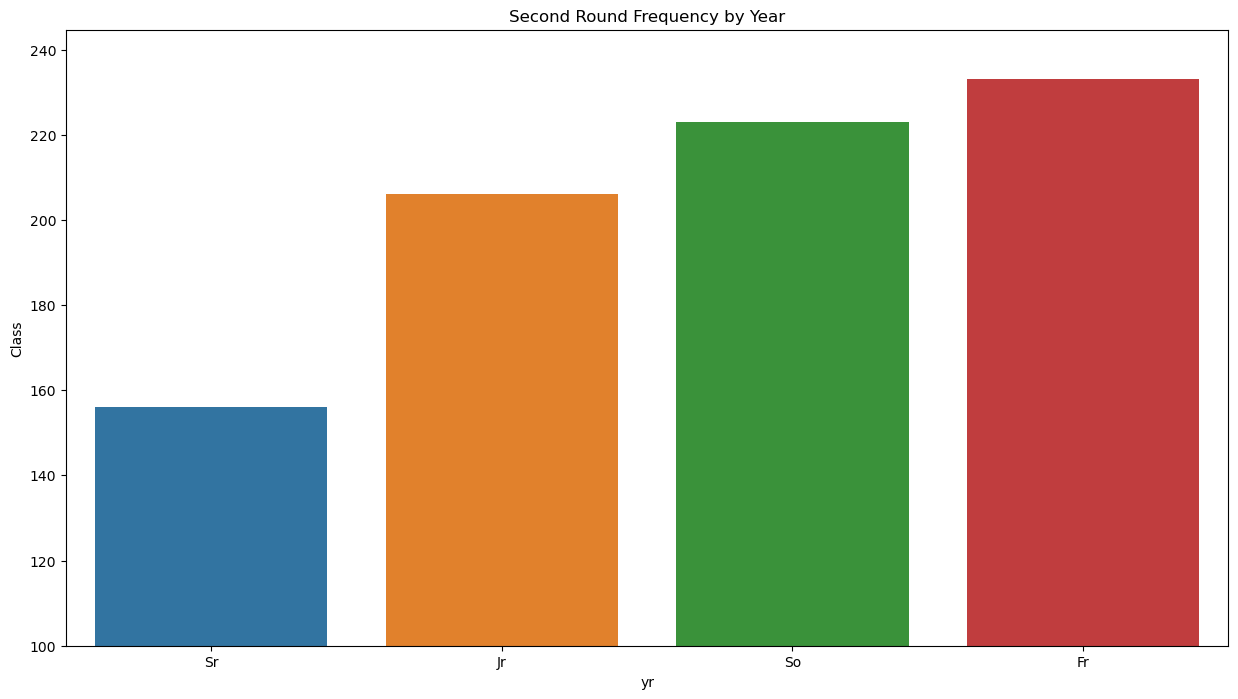

In [104]:
year_two = second_rd.groupby(['yr'])['Class'].count().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='yr', y='Class', data=year_two)

ax.set_title('Second Round Frequency by Year')

ax.set_ylim(100)

plt.show()

In [ ]:
#combined data

agg_data = data.groupby(['Class']).agg(['mean', 'median'])

In [86]:
#creating list to loop through
plotting = []

for i in list(agg_data.columns):
    if i[0] in plotting:
        continue
    else:
        plotting.append(i[0])

<Figure size 640x480 with 0 Axes>

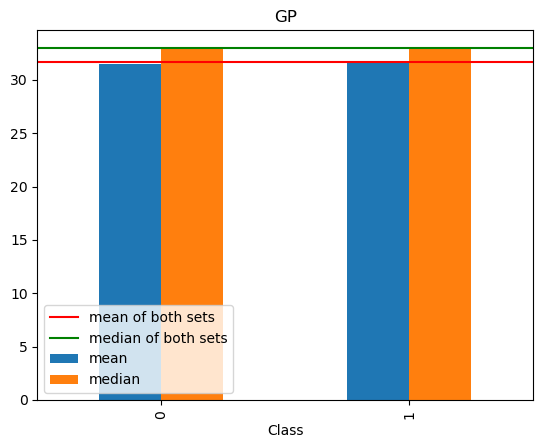

<Figure size 640x480 with 0 Axes>

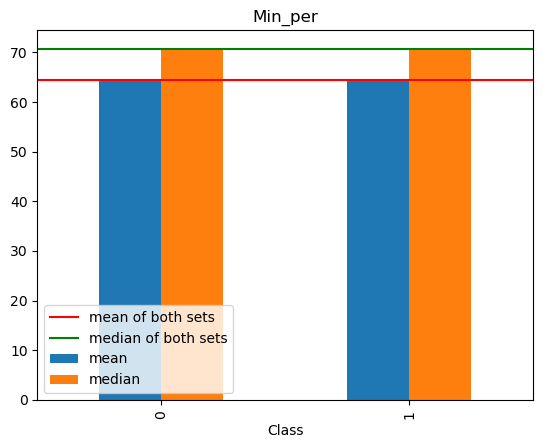

<Figure size 640x480 with 0 Axes>

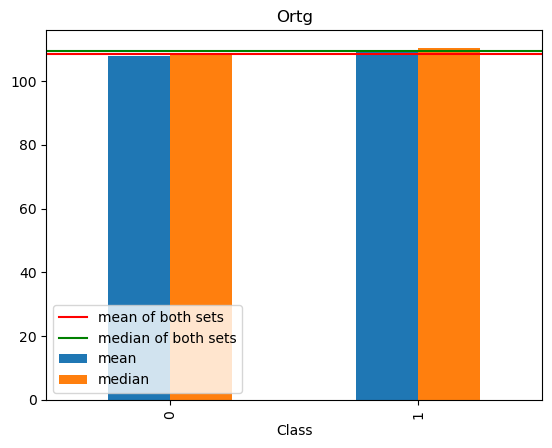

<Figure size 640x480 with 0 Axes>

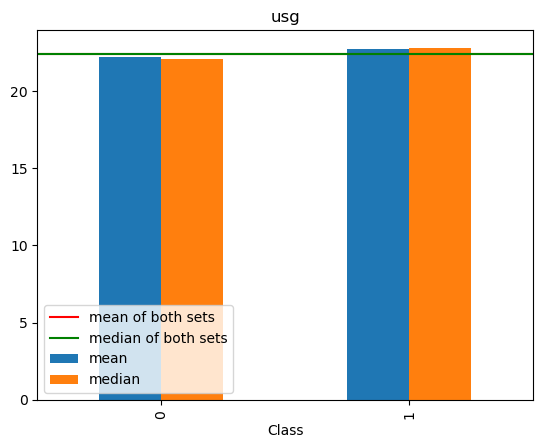

<Figure size 640x480 with 0 Axes>

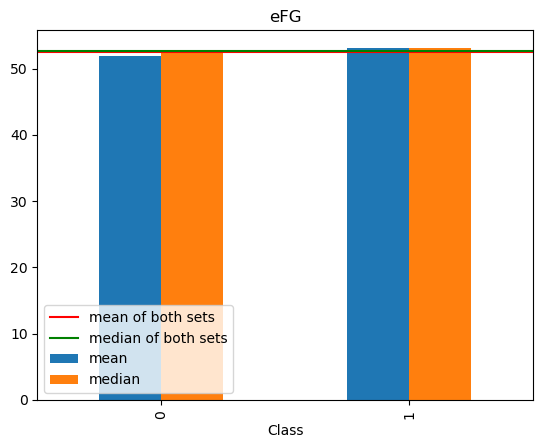

<Figure size 640x480 with 0 Axes>

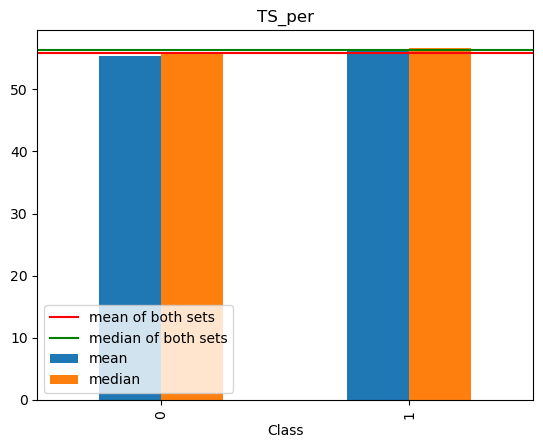

<Figure size 640x480 with 0 Axes>

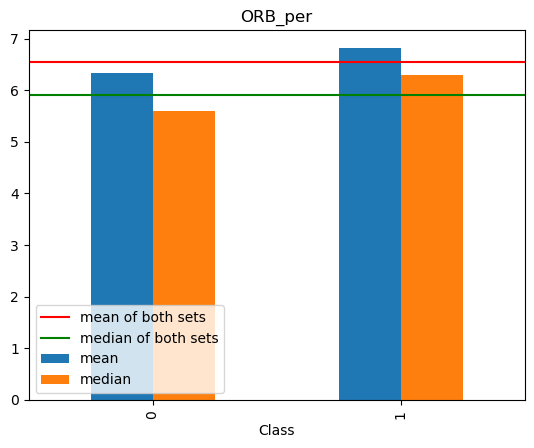

<Figure size 640x480 with 0 Axes>

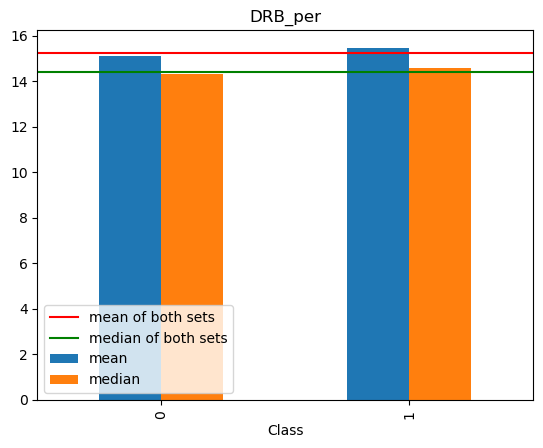

<Figure size 640x480 with 0 Axes>

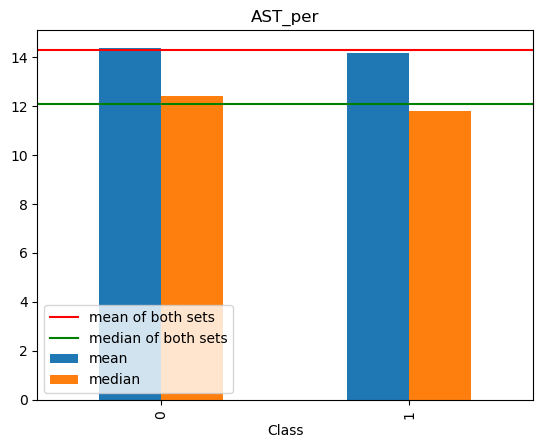

<Figure size 640x480 with 0 Axes>

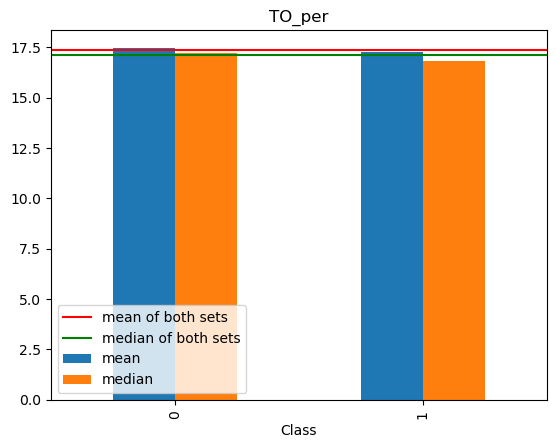

<Figure size 640x480 with 0 Axes>

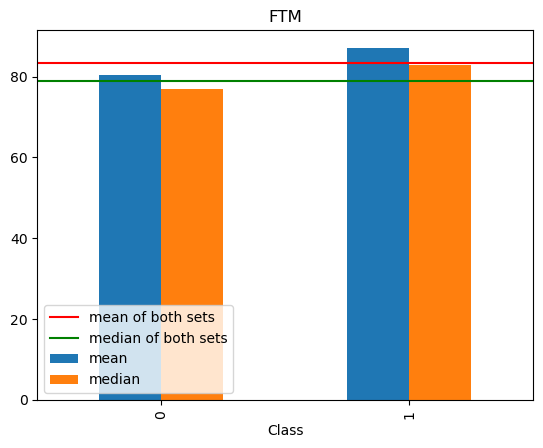

<Figure size 640x480 with 0 Axes>

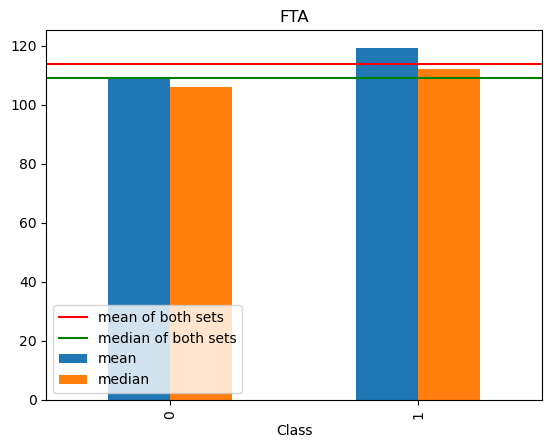

<Figure size 640x480 with 0 Axes>

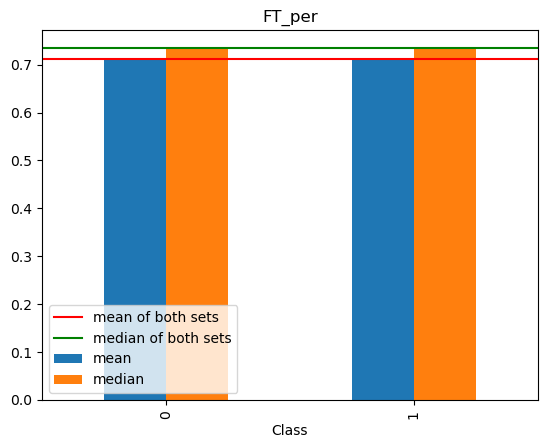

<Figure size 640x480 with 0 Axes>

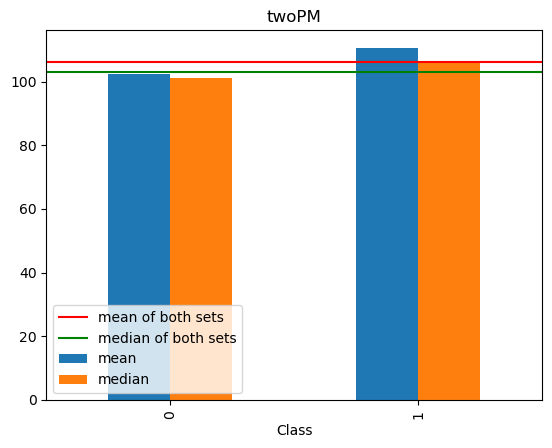

<Figure size 640x480 with 0 Axes>

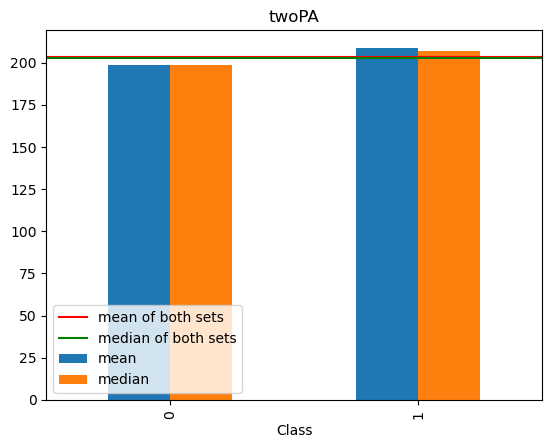

<Figure size 640x480 with 0 Axes>

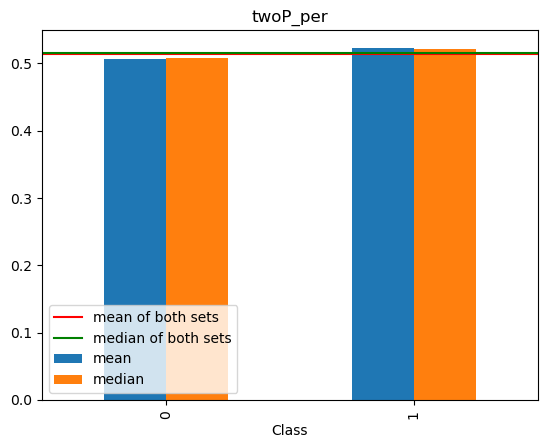

<Figure size 640x480 with 0 Axes>

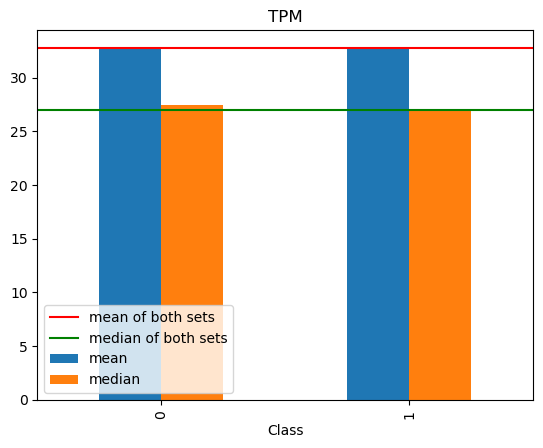

<Figure size 640x480 with 0 Axes>

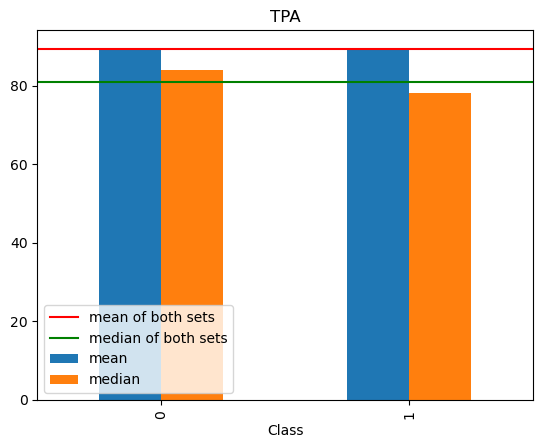

<Figure size 640x480 with 0 Axes>

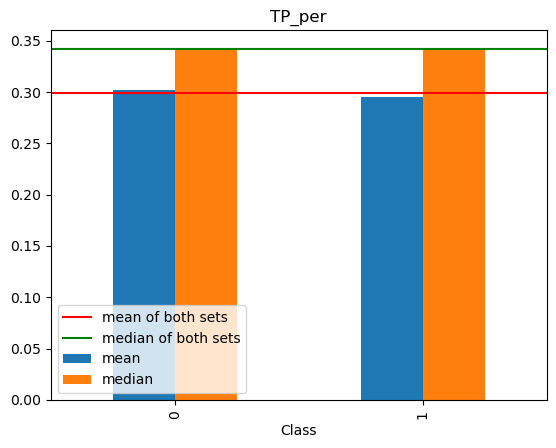

<Figure size 640x480 with 0 Axes>

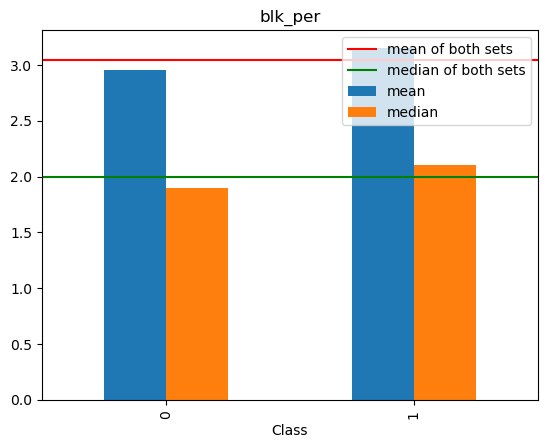

<Figure size 640x480 with 0 Axes>

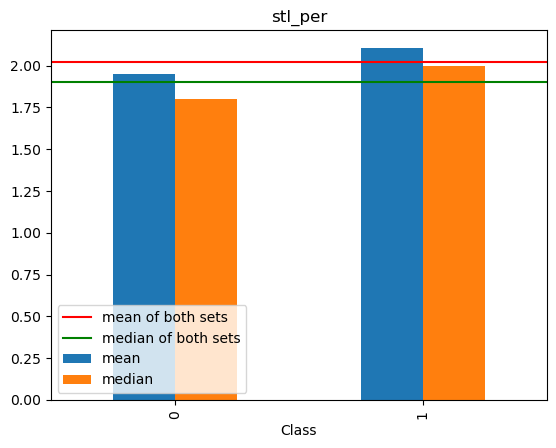

<Figure size 640x480 with 0 Axes>

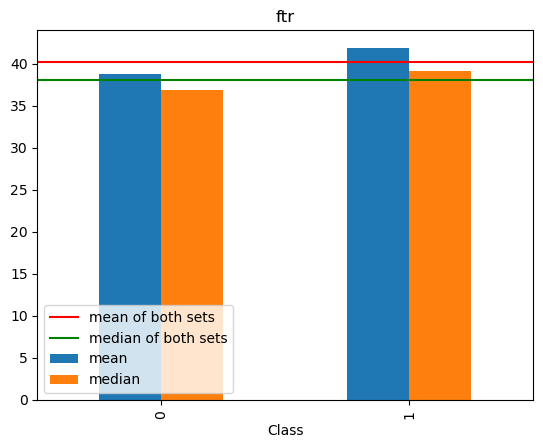

<Figure size 640x480 with 0 Axes>

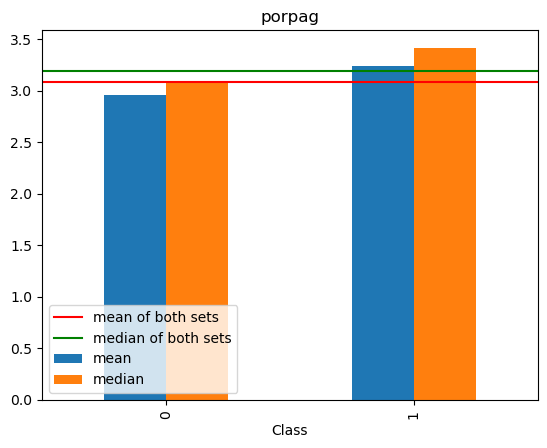

<Figure size 640x480 with 0 Axes>

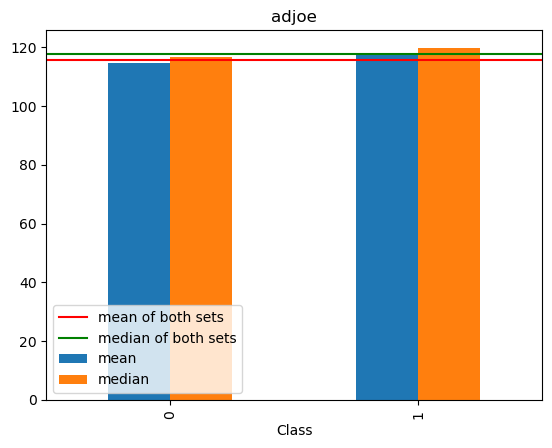

<Figure size 640x480 with 0 Axes>

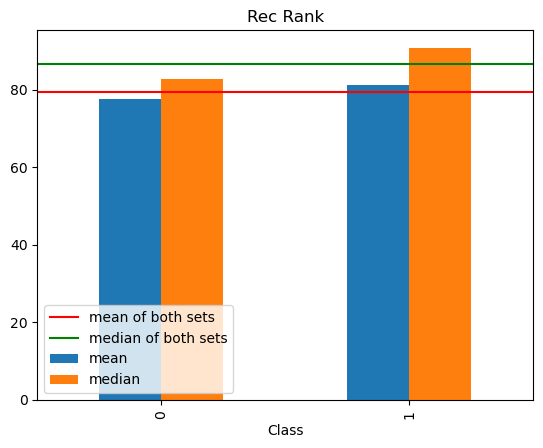

<Figure size 640x480 with 0 Axes>

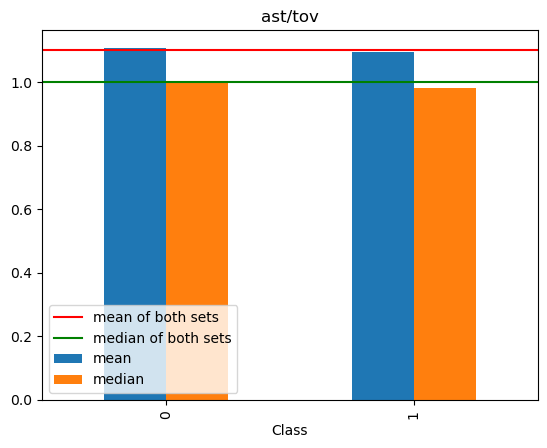

<Figure size 640x480 with 0 Axes>

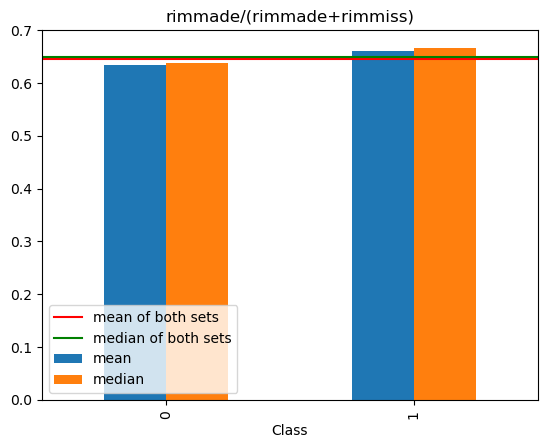

<Figure size 640x480 with 0 Axes>

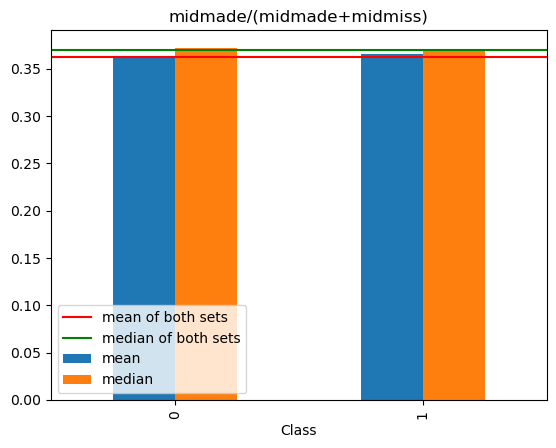

<Figure size 640x480 with 0 Axes>

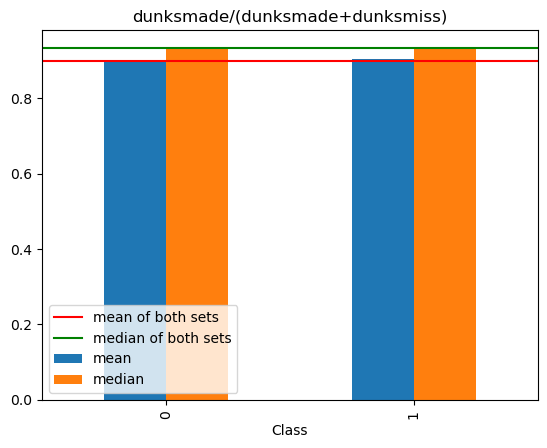

<Figure size 640x480 with 0 Axes>

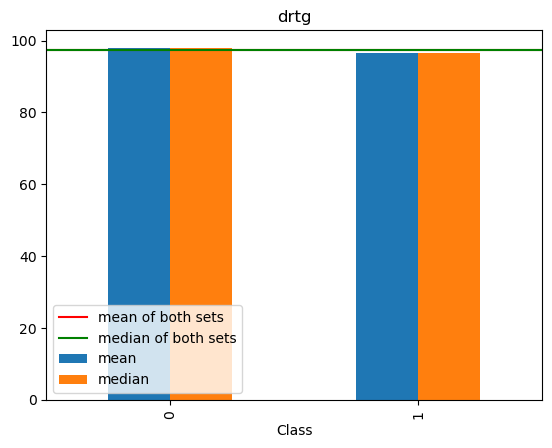

<Figure size 640x480 with 0 Axes>

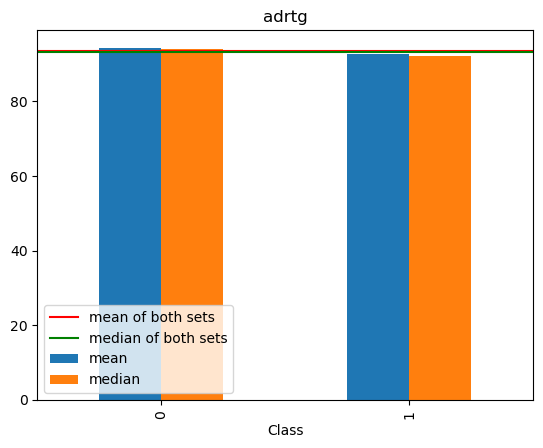

<Figure size 640x480 with 0 Axes>

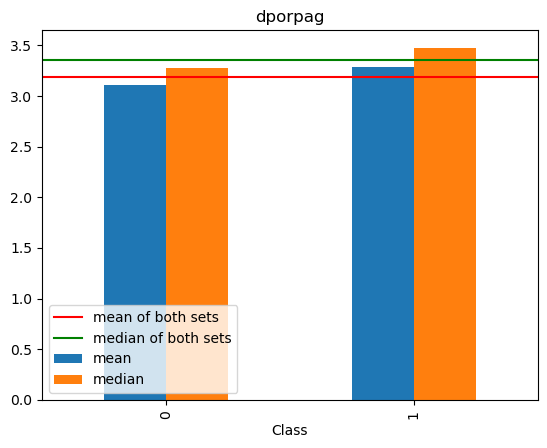

<Figure size 640x480 with 0 Axes>

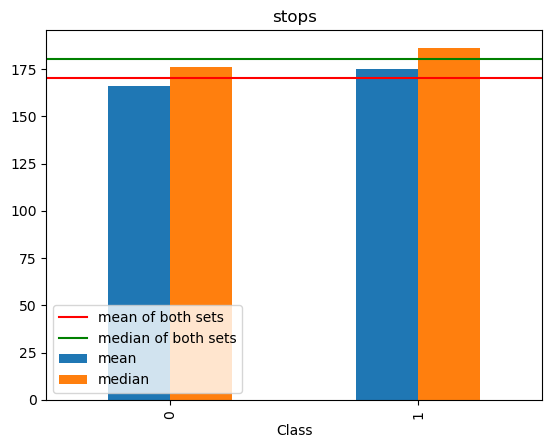

<Figure size 640x480 with 0 Axes>

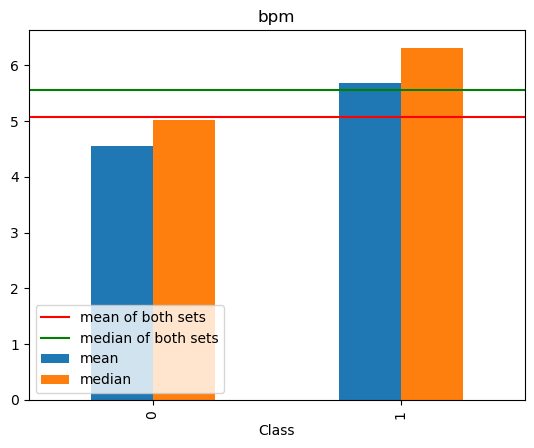

<Figure size 640x480 with 0 Axes>

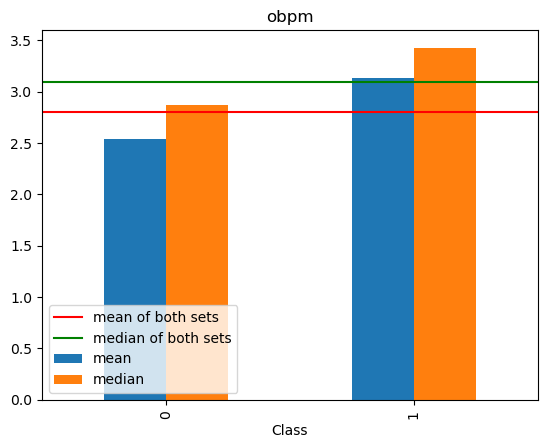

<Figure size 640x480 with 0 Axes>

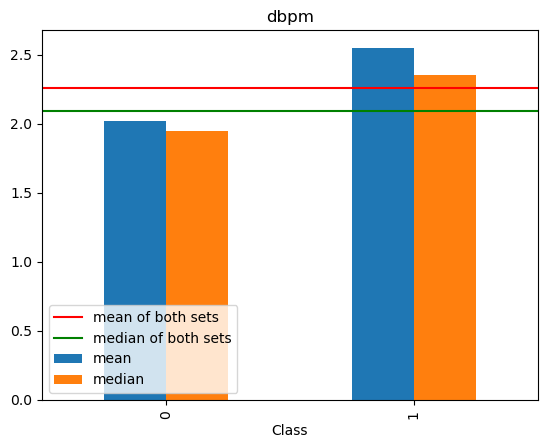

<Figure size 640x480 with 0 Axes>

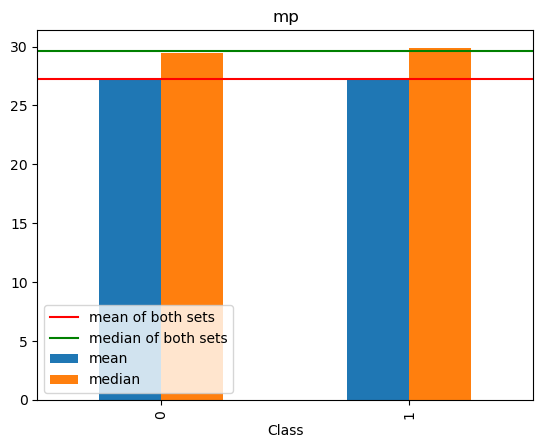

<Figure size 640x480 with 0 Axes>

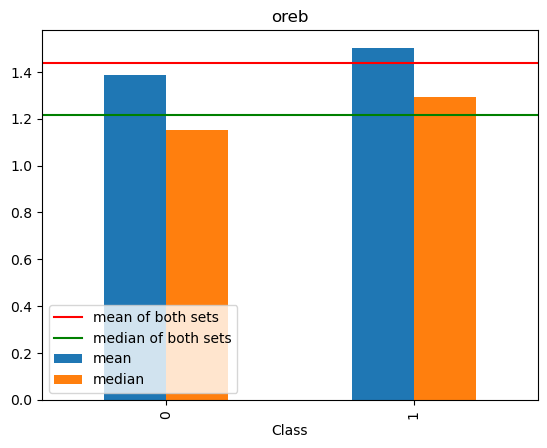

<Figure size 640x480 with 0 Axes>

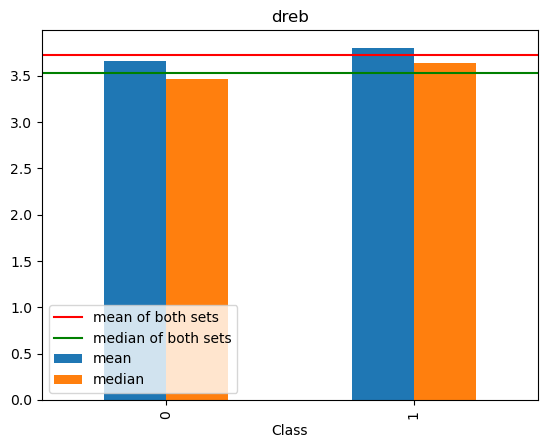

<Figure size 640x480 with 0 Axes>

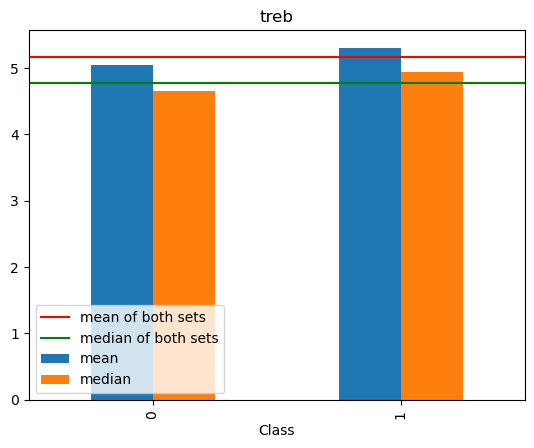

<Figure size 640x480 with 0 Axes>

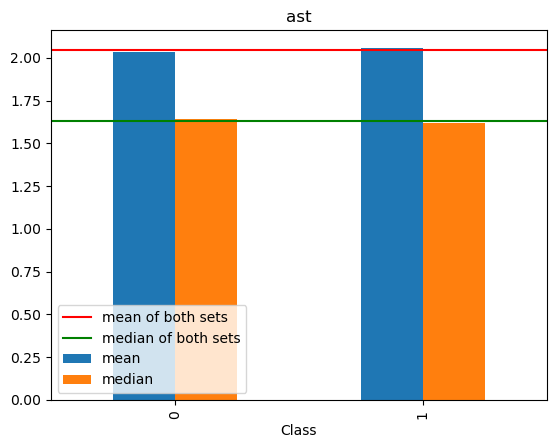

<Figure size 640x480 with 0 Axes>

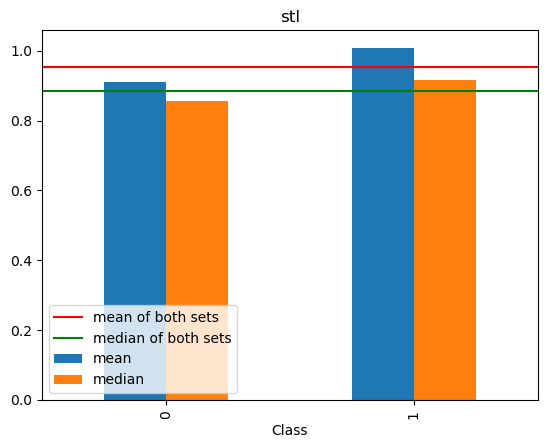

<Figure size 640x480 with 0 Axes>

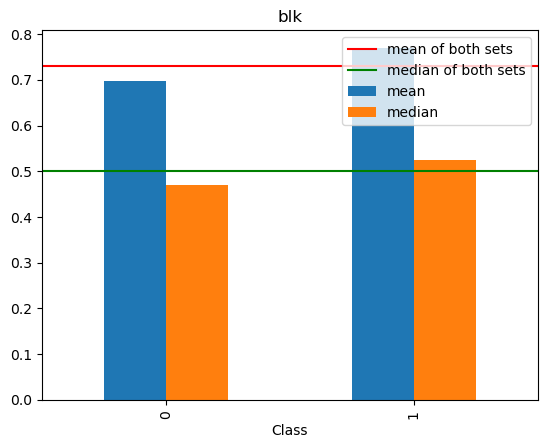

<Figure size 640x480 with 0 Axes>

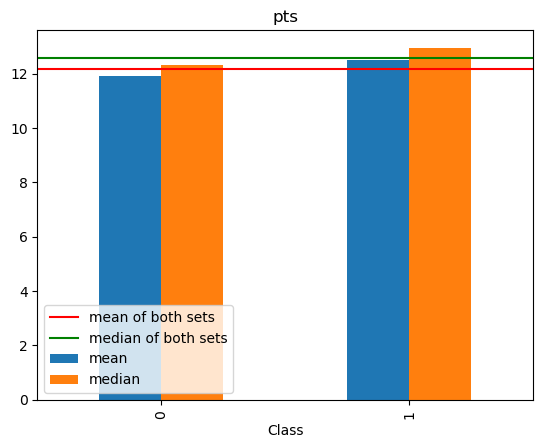

In [108]:
for i in plotting:
    agg_data[i].plot(kind='bar')
    plt.axhline(data[i].mean(), color='red', label='mean of both sets')
    plt.axhline(data[i].median(), color='g', label= 'median of both sets')
    plt.title(i)
    plt.legend()
    plt.show()
    plt.clf()

In [125]:
from scipy.stats import ttest_ind


def ttest(A, B, i):

    tstat, pval = ttest_ind(A[i], B[i], equal_var=False)
    print('{}: {}'.format(i, pval))


selected_cols = ['ORB_per', 'AST_per', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPA', 'blk_per', 'stl_per', 'ftr','porpag', 'Rec Rank', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'treb']

for i in selected_cols:

    ttest(first_rd, second_rd, i)

ORB_per: 0.022373504852642424
AST_per: 0.621992229705563
FTM: 0.009444412850011795
FTA: 0.0028624530479329164
twoPM: 0.0064073991953251365
twoPA: 0.06536280957203949
TPA: 0.8773818139073044
blk_per: 0.19864422848815047
stl_per: 0.0011703897631473801
ftr: 0.007876589814481463
porpag: 0.0012601397952812577
Rec Rank: nan
dporpag: 0.0018221762124607823
stops: 0.007943730987877502
bpm: 6.98917383744234e-08
obpm: 0.00017316169081619452
dbpm: 2.133746860607521e-05
treb: 0.04675470710915651


In [129]:
ttest_ind(first_rd['Rec Rank'].dropna(),second_rd['Rec Rank'].dropna(), equal_var=False)

Ttest_indResult(statistic=3.061586991096907, pvalue=0.0022505279401483966)